# Pima Indians Diabetes 

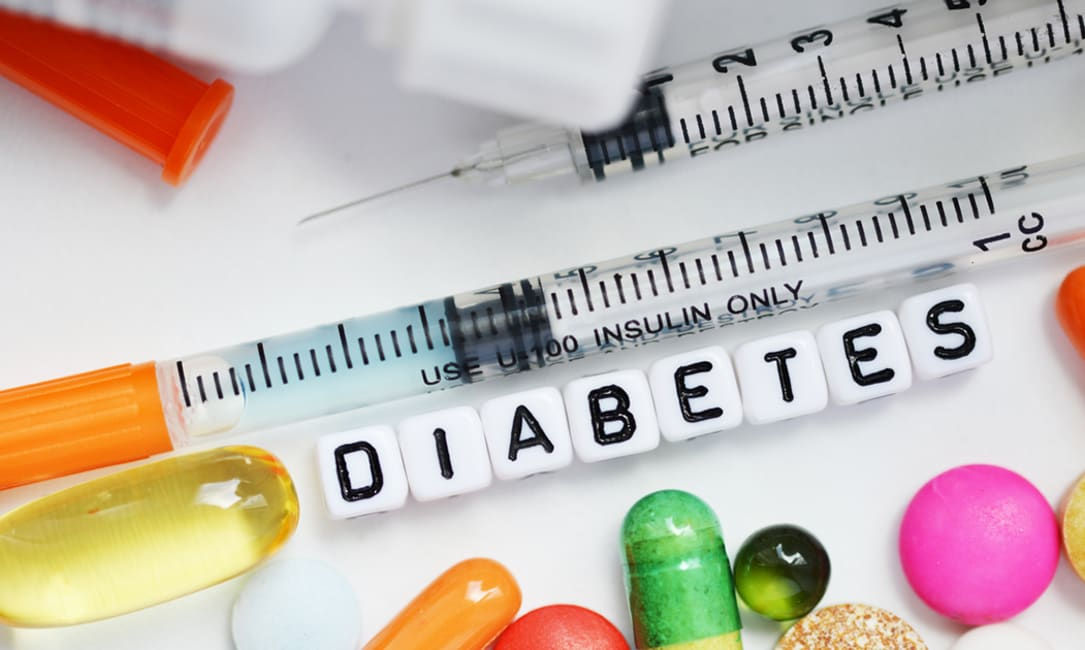

<font color = '#F0C243'>
Content:
    
1. [Load and check data](#1)
1. [Analysis of variables](#2)
1. [Sampling](#3)    
1. [Missing Value](#4)     
1. [Outlier Detection](#5)
    *           [Isolation Forest](#6)
    *           [Interquartile Range(IQR)](#7)
1. [Feature Selection](#8) 
1. [Normalization](#9)
1. [Models](#30)    
    *           [CatBoost Classifier](#10)
    *           [XGBoost Classifier](#11)
    *           [Random Forest](#12) 
    *           [Decision Tree](#13)
    *           [KNN](#14)
    *           [Logistic Regression](#15)
    *           [Support Vector Classifier](#16)
1. [Comparisons](#17)
    

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


<a id = "1"></a><br>
# Load and Check Data

In [2]:
data=pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## When we compare the minimum and maximum values with the average, it is understood that we have some outliers. Let's see them in boxplot.

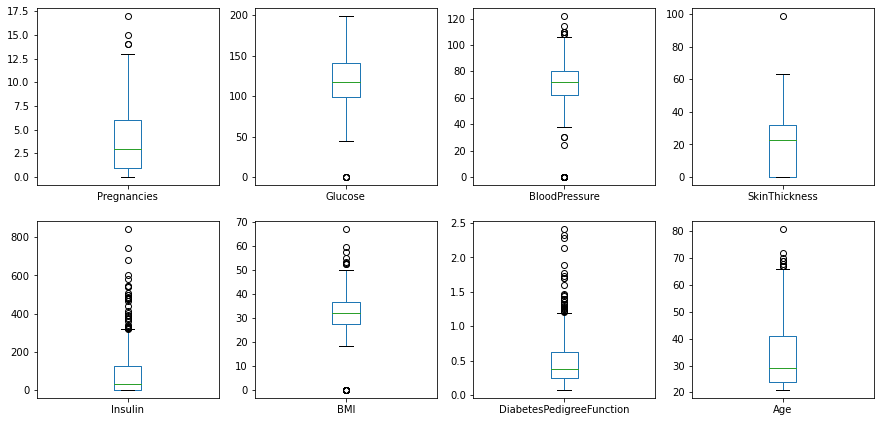

In [5]:
data1=data.drop('Outcome',axis=1)
data1.plot(kind='box', subplots=True, layout=(4,4), sharex=False,sharey=False ,figsize =(15,15))
plt.show()


<a id = "2"></a><br>
# Analysis of variables

In [6]:
def bar_plot(variable):
    var =data[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,7))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,varValue))

In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

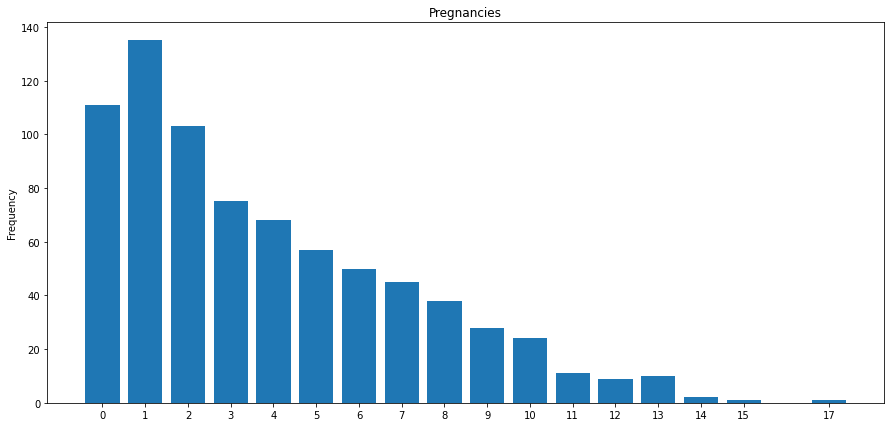

Pregnancies: 
 1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64


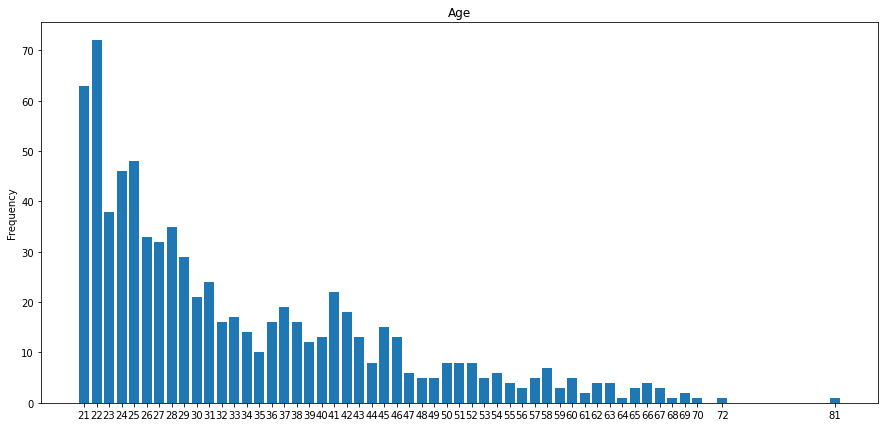

Age: 
 22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
32    16
36    16
38    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
50     8
44     8
51     8
52     8
58     7
47     6
54     6
57     5
60     5
48     5
49     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
69     2
72     1
64     1
68     1
70     1
81     1
Name: Age, dtype: int64


In [8]:
category1 = ['Pregnancies','Age']
    
for c in category1:
    bar_plot(c)

## Let's look at the distribution of variables according to the target.

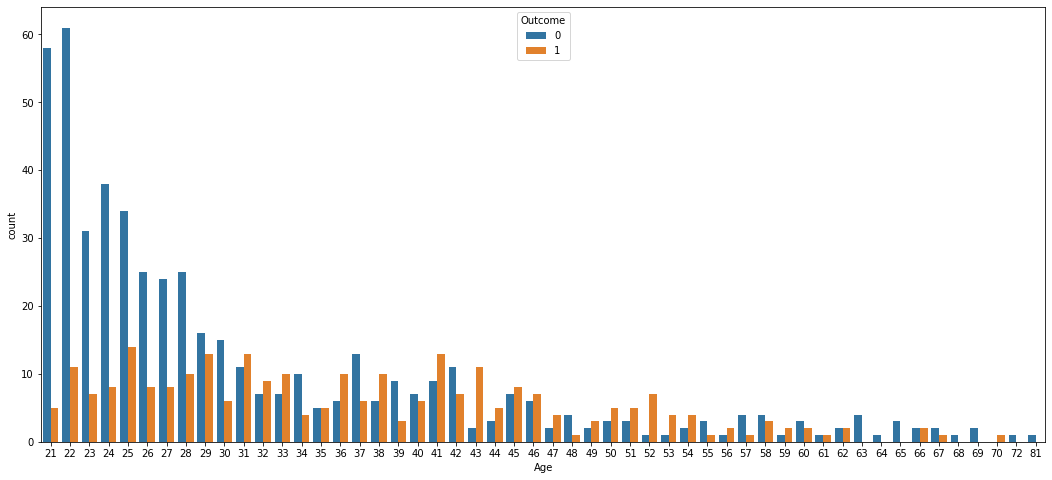

In [9]:
from matplotlib import pyplot
a4_dims = (18, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(x='Age',hue='Outcome',data=data, linewidth=1,ax=ax)

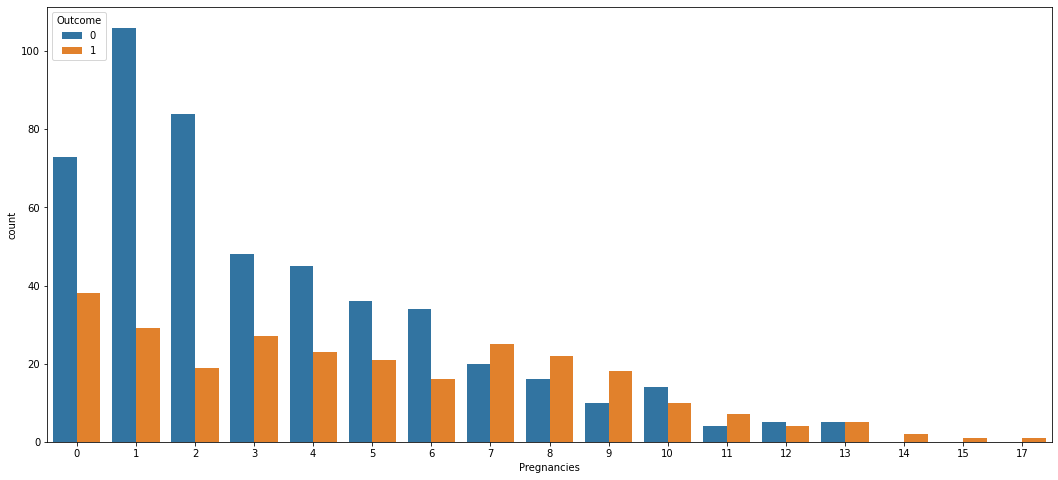

In [10]:
a4_dims = (18, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(x='Pregnancies',hue='Outcome',data=data, linewidth=1,ax=ax)

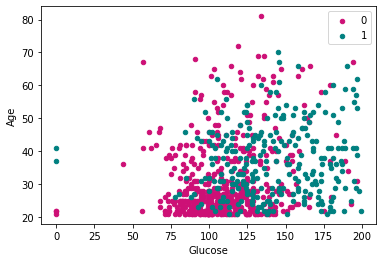

In [11]:
colors = {0:'#cd1076', 1:'#008080'}
fig, ax = plt.subplots()
grouped = data.groupby('Outcome')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter'
               ,x='Glucose', y='Age', label=key
               ,color=colors[key])
plt.show()

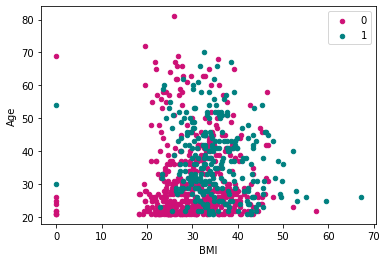

In [12]:
colors = {0:'#cd1076', 1:'#008080'}
fig, ax = plt.subplots()
grouped = data.groupby('Outcome')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter'
               ,x='BMI', y='Age', label=key
               ,color=colors[key])
plt.show()

<a id = "3"></a><br>
# And the distribution of our target column

0    500
1    268
Name: Outcome, dtype: int64


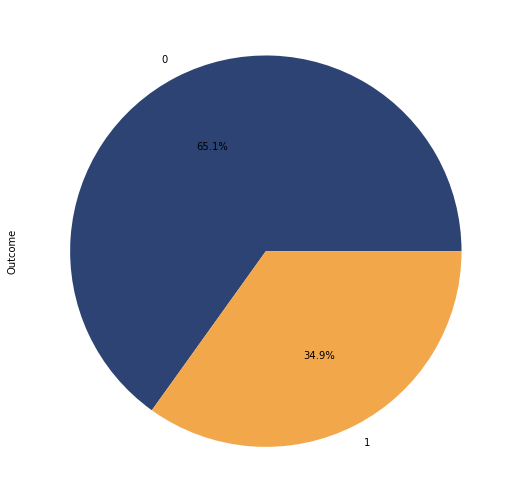

In [13]:
data['Outcome'].value_counts().plot(kind='pie',colors=['#2C4373', '#F2A74B'],autopct='%1.1f%%',figsize=(9,9))
plt.show
varValue = data.Outcome.value_counts()
print(varValue)

## Our dataset does not seem too balance. Let's balance it with Upsampling method

In [14]:
from sklearn.utils import resample
df_majority = data.loc[data.Outcome == 0].copy()
df_minority = data.loc[data.Outcome == 1].copy()
df_minority_upsampled = resample(df_minority,
                             replace=True,  # sample with replacement
                            n_samples=500,  # to match majority class
                            random_state=123) 
data = pd.concat([df_majority, df_minority_upsampled])

# Current Version:

1    500
0    500
Name: Outcome, dtype: int64


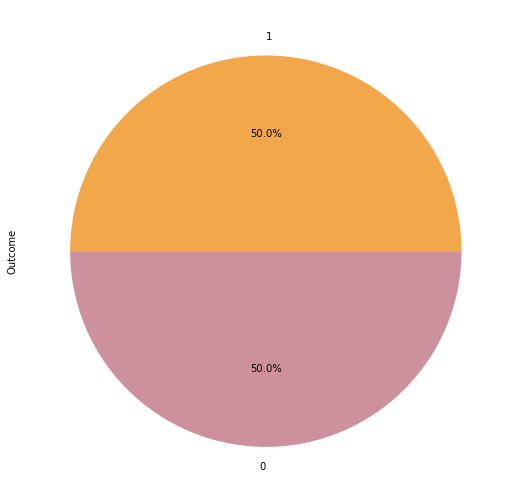

In [15]:
data['Outcome'].value_counts().plot(kind='pie',colors=['#F2A74B', '#cd919e'],autopct='%1.1f%%',figsize=(9,9))
plt.show
varValue = data.Outcome.value_counts()
print(varValue)

<a id = "4"></a><br>
# Missing Value

In [16]:
data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## No missing value.

<a id = "5"></a><br>
# Outlier Detection
* Isolation Forest
* Interquartile Range (IQR)

<a id = "6"></a><br>
# Isolation Forest
## -1= Number of Outliers

In [17]:
from sklearn.ensemble import IsolationForest
from collections import Counter
rs=np.random.RandomState(0)
clf = IsolationForest(max_samples=100,random_state=rs, contamination=.1) 
clf.fit(data)
y_pred_train = clf.predict(data)
sayı = Counter(y_pred_train)
print(sayı)

Counter({1: 900, -1: 100})


<a id = "7"></a><br>
# Interquartile Range (IQR)

In [18]:
from collections import Counter
def detect_outliers(data,features):
    outlier_indices = []
    for c in features:
        # 1st quartile
        Q1 = np.percentile(data[c],25)
        # 3rd quartile
        Q3 = np.percentile(data[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [19]:
data.loc[detect_outliers(data,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
298,14,100,78,25,184,36.6,0.412,46,1
298,14,100,78,25,184,36.6,0.412,46,1
298,14,100,78,25,184,36.6,0.412,46,1
298,14,100,78,25,184,36.6,0.412,46,1
298,14,100,78,25,184,36.6,0.412,46,1
298,14,100,78,25,184,36.6,0.412,46,1
349,5,0,80,32,0,41.0,0.346,37,1
349,5,0,80,32,0,41.0,0.346,37,1
349,5,0,80,32,0,41.0,0.346,37,1
78,0,131,0,0,0,43.2,0.270,26,1


# We drop the rows with outliers.

In [20]:
data = data.drop([298,349,78,261,193,706,125,177,579,220,715,655,584,618,661,659,45,243], axis=0)


<a id = "8"></a><br>
# Feature Selection

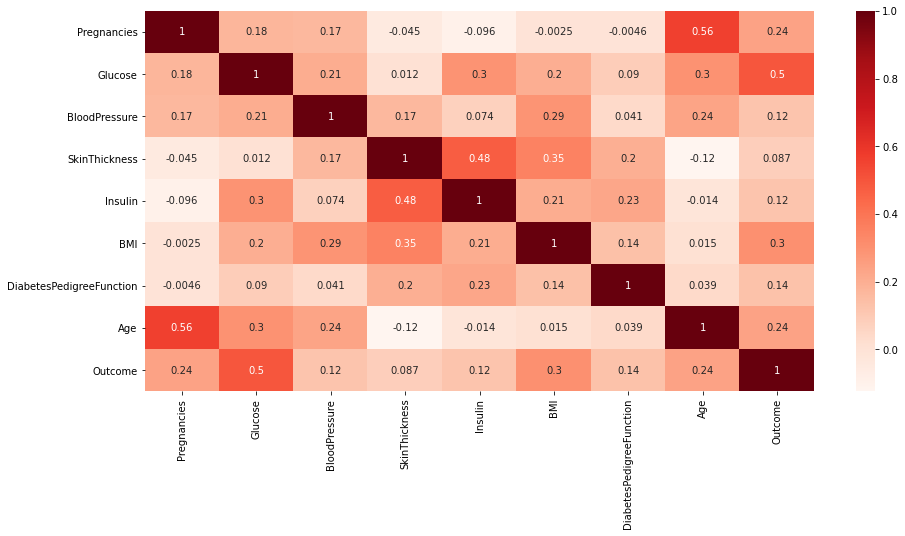

Pregnancies    0.241801
Glucose        0.498998
BMI            0.303193
Age            0.242754
Outcome        1.000000
Name: Outcome, dtype: float64

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


data["Outcome"] = data.Outcome
X = data.drop("Outcome",1)
y = data["Outcome"]
data.head()
plt.figure(figsize=(15,7))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

cor_target = abs(cor["Outcome"]) #absolute value
#High Correlations
relevant_features = cor_target[cor_target>=0.2]
relevant_features

In [22]:
newdata=data.drop(['BloodPressure', 'SkinThickness', 'Insulin','DiabetesPedigreeFunction'],axis=1)

In [23]:
newdata.head()

,Pregnancies,Glucose,BMI,Age,Outcome
1,1,85,26.6,31,0
3,1,89,28.1,21,0
5,5,116,25.6,30,0
7,10,115,35.3,29,0
10,4,110,37.6,30,0


In [24]:
data=pd.DataFrame(newdata)

<a id = "9"></a><br>
# Normalization

In [25]:
from sklearn.preprocessing import StandardScaler
X = data.iloc[:, 0:4]
Y = data.iloc[:, 4]
nd = StandardScaler()
nd.fit(X)
X =nd.transform(X)
print(Y)

1      0
3      0
5      0
7      0
10     0
      ..
23     1
429    1
701    1
476    1
110    1
Name: Outcome, Length: 941, dtype: int64


<a id = "30"></a><br>
# Models

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn import model_selection
                  
X = data.iloc[:, 0:4]
Y = data.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)

#to plot a graph
accuracies ={} 
means={}
randoms={}


<a id = "10"></a><br>
# CatBoost Classifier
### CatBoost is a machine learning algorithm that uses gradient boosting on decision trees.
1. RandomCV
1. Cross Validation

### RandomizedSearchCV

In [27]:
from catboost import CatBoostClassifier
cparams = {'depth':range(1,15),
          'iterations':[100],
          'learning_rate':[0.03,0.001,0.1], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,50,100,200],
          
          }
model = CatBoostClassifier()
c_randomcv_model=RandomizedSearchCV(estimator=model,param_distributions=cparams, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.4s


0:	learn: 0.6613674	total: 48.7ms	remaining: 4.82s
1:	learn: 0.6352803	total: 49.6ms	remaining: 2.43s
2:	learn: 0.6123237	total: 50.2ms	remaining: 1.62s
3:	learn: 0.5916270	total: 51.2ms	remaining: 1.23s
4:	learn: 0.5734911	total: 51.9ms	remaining: 986ms
5:	learn: 0.5573403	total: 52.7ms	remaining: 825ms
6:	learn: 0.5422597	total: 53.4ms	remaining: 710ms
7:	learn: 0.5304422	total: 54.1ms	remaining: 622ms
8:	learn: 0.5205666	total: 54.5ms	remaining: 551ms
9:	learn: 0.5089065	total: 55ms	remaining: 495ms
10:	learn: 0.5012599	total: 55.5ms	remaining: 449ms
11:	learn: 0.4935503	total: 55.9ms	remaining: 410ms
12:	learn: 0.4864357	total: 56.3ms	remaining: 377ms
13:	learn: 0.4798362	total: 56.7ms	remaining: 348ms
14:	learn: 0.4743596	total: 57.2ms	remaining: 324ms
15:	learn: 0.4702887	total: 57.6ms	remaining: 302ms
16:	learn: 0.4652909	total: 58ms	remaining: 283ms
17:	learn: 0.4618609	total: 58.5ms	remaining: 267ms
18:	learn: 0.4577408	total: 59.1ms	remaining: 252ms
19:	learn: 0.4537450	total

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   24.9s finished


In [28]:
print('Catboost_randomcv_model accuracy = {}'.format(c_randomcv_model.best_score_))
random=c_randomcv_model.best_score_*100
randoms['Catboost']=random

Catboost_randomcv_model accuracy = 0.8005916114790288


### Cross Validation

In [29]:
kfold=model_selection.KFold(n_splits=5)
modelL=CatBoostClassifier(learning_rate=0.03,l2_leaf_reg=3,iterations=100,depth=12,border_count=32)
results=model_selection.cross_val_score(modelL,X,Y,cv=kfold)


0:	learn: 0.6859225	total: 9.6ms	remaining: 951ms
1:	learn: 0.6789694	total: 14.3ms	remaining: 702ms
2:	learn: 0.6715667	total: 16.8ms	remaining: 544ms
3:	learn: 0.6644306	total: 21ms	remaining: 505ms
4:	learn: 0.6582649	total: 25.9ms	remaining: 492ms
5:	learn: 0.6507646	total: 30.2ms	remaining: 473ms
6:	learn: 0.6445986	total: 33.9ms	remaining: 450ms
7:	learn: 0.6387902	total: 38.2ms	remaining: 439ms
8:	learn: 0.6324738	total: 38.9ms	remaining: 393ms
9:	learn: 0.6272370	total: 42.8ms	remaining: 385ms
10:	learn: 0.6218183	total: 46.5ms	remaining: 376ms
11:	learn: 0.6164290	total: 51.2ms	remaining: 376ms
12:	learn: 0.6099378	total: 52ms	remaining: 348ms
13:	learn: 0.6045391	total: 56.1ms	remaining: 345ms
14:	learn: 0.5988543	total: 60.1ms	remaining: 340ms
15:	learn: 0.5941916	total: 65.3ms	remaining: 343ms
16:	learn: 0.5892499	total: 70ms	remaining: 342ms
17:	learn: 0.5845722	total: 74.8ms	remaining: 341ms
18:	learn: 0.5796675	total: 78.7ms	remaining: 336ms
19:	learn: 0.5737024	total: 7

In [30]:
print(results)
print(results.mean()*100)
mean=results.mean()*100
means['Catboost']=mean

[0.62962963 0.75531915 0.7712766  0.65957447 0.68617021]
70.03940110323089


<a id = "11"></a><br>
# XGBOOST Classifier
1. Manual Tuning
1. Randomized Search CV
1. Grid Search CV
1. Cross Validation

### Manual Tuning

[0.7671957671957672, 0.7724867724867724, 0.7883597883597884, 0.7724867724867724, 0.8201058201058201, 0.8095238095238095, 0.8201058201058201, 0.8306878306878307, 0.8359788359788359, 0.8306878306878307]


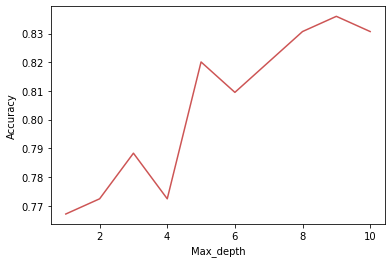

In [31]:
from xgboost import XGBClassifier
accuracy = []
for n in range(1,11):
    xgb =XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.78,
                           colsample_bytree=1, max_depth=n)
    xgb.fit(X_train,y_train)
    prediction = xgb.predict(X_test)
    accuracy.append(accuracy_score(y_test, prediction))
print(accuracy)    
plt.plot(range(1,11), accuracy,color='#cd5555')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.show()    

### RandomizedSearchCV

In [32]:
from sklearn.model_selection import RandomizedSearchCV
xgb_params = {
    'learning_rate' : [0.08, 0.06, 0.04, 0.09],      
    'max_depth': range(1,40),
    'n_estimators': [100, 200, 300,500,1000]}
xgb =XGBClassifier()
xgb_randomcv_model=RandomizedSearchCV(estimator=xgb, param_distributions=xgb_params, n_iter=2, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(xgb_randomcv_model.best_params_)
print('xgb_randomcv_model accuracy = {}'.format(xgb_randomcv_model.best_score_))
random=xgb_randomcv_model.best_score_*100
randoms['XGBoost']=random

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'n_estimators': 100, 'max_depth': 36, 'learning_rate': 0.08}
xgb_randomcv_model accuracy = 0.8364944812362032


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished


### GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV
xgb_params = { 'learning_rate' : [0.08, 0.06, 0.04, 0.09],      
    'max_depth': range(1,40),
    'n_estimators': [100, 200, 300,500,1000]}
xgb =XGBClassifier()
xgb_gridcv_model = GridSearchCV(estimator=xgb, param_grid=xgb_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(xgb_gridcv_model.best_params_)
print('rf gridcv model accuracy score = {}'.format(xgb_gridcv_model.best_score_))
acc=xgb_gridcv_model.best_score_ *100
accuracies[' XGBoost Gridsearch']=acc


Fitting 5 folds for each of 780 candidates, totalling 3900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    3.9s
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 461 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1109 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1554 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2081 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2688 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 3377 tasks      | elapsed:  5.4min


{'learning_rate': 0.09, 'max_depth': 11, 'n_estimators': 100}
rf gridcv model accuracy score = 0.844503311258278


[Parallel(n_jobs=-1)]: Done 3900 out of 3900 | elapsed:  6.2min finished


### Cross Validation

In [34]:
kfold=model_selection.KFold(n_splits=5)
modelL=XGBClassifier(n_estimators=100, max_depth=11,learning_rate=0.09)
results=model_selection.cross_val_score(modelL,X,Y,cv=kfold)
print(results)
print(results.mean()*100)
mean=results.mean()*100
means['XGBoost']=mean

[0.6984127  0.7712766  0.84042553 0.81382979 0.84574468]
79.39378588314759


<a id = "12"></a><br>
# Random Forest 

### RandomizedSearchCV
1. Randomized Search CV
1. Cross Validation

### RandomizedSearchCV

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_params = {
   'max_depth': range(1,40),
    'max_features': range(1,40),
    'min_samples_leaf': range(1,20),
    'min_samples_split': range(1,20),
    'n_estimators': [100, 200, 300,500,1000]}
rf=RandomForestClassifier()
rf_randomcv_model=RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(rf_randomcv_model.best_params_)
print('rf_randomcv_model accuracy score = {}'.format(rf_randomcv_model.best_score_))
random=rf_randomcv_model.best_score_*100
randoms['Random Forest']=random

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.9s finished


{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 1, 'max_depth': 17}
rf_randomcv_model accuracy score = 0.7952935982339956


### Cross Validation

In [36]:
kfold=model_selection.KFold(n_splits=5)
modelL=RandomForestClassifier(n_estimators=100,min_samples_split=14, min_samples_leaf=4,max_depth=7)
results=model_selection.cross_val_score(modelL,X,Y,cv=kfold)
print(results)
print(results.mean()*100)
mean=results.mean()*100
means['Random Forest']=mean

[0.63492063 0.7712766  0.78191489 0.62765957 0.69148936]
70.145221209051


<a id = "13"></a><br>
# Decision Tree
1. Randomized Search CV
1. Cross Validation

### RandomizedSearchCV

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt_params = {'min_weight_fraction_leaf' : [0.0 , 0.2 , 0.4 , 0.6 ,0.8],
   'max_depth': range(1,40),
    'max_features': range(1,40),
    'min_samples_leaf': range(1,40),
    'max_leaf_nodes' : range(1,40)
    
    }
dt=DecisionTreeClassifier()
dt_randomcv_model=RandomizedSearchCV(estimator=dt, param_distributions=dt_params, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(dt_randomcv_model.best_params_)
print('rf_randomcv_model accuracy score = {}'.format(dt_randomcv_model.best_score_))
random=dt_randomcv_model.best_score_*100
randoms['Decision Tree']=random

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s


{'min_weight_fraction_leaf': 0.4, 'min_samples_leaf': 11, 'max_leaf_nodes': 27, 'max_features': 4, 'max_depth': 22}
rf_randomcv_model accuracy score = 0.7234348785871964


[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished


### Cross Validation

In [38]:
kfold=model_selection.KFold(n_splits=5)
modelL=DecisionTreeClassifier(min_weight_fraction_leaf=0.0,max_features=3, min_samples_leaf=15,max_depth=7,max_leaf_nodes=28)
results=model_selection.cross_val_score(modelL,X,Y,cv=kfold)
print(results)
print(results.mean()*100)
mean=results.mean()*100
means['Decision Tree']=mean

[0.59259259 0.73404255 0.70744681 0.60106383 0.57446809]
64.19227738376675


<a id = "14"></a><br>
# KNN
1. RandomizedSearch CV
1. GridSearch CV
1. Cross Validation

### RandomizedSearchCV

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn_params = {'n_neighbors' : range(1,10)
   }
knn=KNeighborsClassifier()
knn_randomcv_model=RandomizedSearchCV(estimator=knn, param_distributions=knn_params, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(knn_randomcv_model.best_params_)
print('rf_randomcv_model accuracy score = {}'.format(knn_randomcv_model.best_score_))
random=knn_randomcv_model.best_score_*100
randoms['KNN']=random

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'n_neighbors': 1}
rf_randomcv_model accuracy score = 0.8390816777041943


[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.4s finished


### GridSearchCV

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn_params = {'n_neighbors' : range(1,10),
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto','ball_tree','kd_tree','brute'],
              'p' : [1,2]
   }
knn=KNeighborsClassifier()
knn_gridcv_model=GridSearchCV(estimator=knn, param_grid=knn_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(knn_gridcv_model.best_params_)
print('rf_randomcv_model accuracy score = {}'.format(knn_gridcv_model.best_score_)) 
acc=knn_gridcv_model.best_score_ *100
accuracies['KNN Gridsearch']=acc


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    0.7s


{'algorithm': 'auto', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
rf_randomcv_model accuracy score = 0.8390816777041943


[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    3.6s finished


### Cross Validation

In [41]:
kfold=model_selection.KFold(n_splits=5)
modelL=KNeighborsClassifier(n_neighbors= 1)
results=model_selection.cross_val_score(modelL,X,Y,cv=kfold)
print(results)
print(results.mean()*100)
mean=results.mean()*100
means['KNN']=mean

[0.71428571 0.81382979 0.81382979 0.81382979 0.79787234]
79.07294832826747


<a id = "15"></a><br>
# Logistic Regression
1. Grid Search CV
1. Cross Validation

### GridSearchCV

In [42]:
from sklearn.linear_model import LogisticRegression
lr_params = {'penalty' : ['l1','l2', 'elasticnet','none'],
              'C' : range(1,7),
            'solver' :['newton-cg','lbfgs','liblinear','sag','saga'],
             'max_iter' : [100,200],
             'multi_class' : ['ovr','multinomial']
   }
lr=LogisticRegression()
lr_gridcv_model=GridSearchCV(estimator=lr, param_grid=lr_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(lr_gridcv_model.best_params_)
print('rf_gridcv_model accuracy score = {}'.format(lr_gridcv_model.best_score_)) 
random=lr_gridcv_model.best_score_*100
randoms['Logistic Regression']=random

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s


{'C': 2, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
rf_gridcv_model accuracy score = 0.7553642384105961


[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:   14.2s finished


### Cross Validation

In [43]:
kfold=model_selection.KFold(n_splits=5)
model=LogisticRegression(C=2,max_iter=100,multi_class='ovr',penalty='l2',solver='liblinear')
results=model_selection.cross_val_score(model,X,Y,cv=kfold)
print(results)
print(results.mean()*100)
mean=results.mean()*100
means['Logistic Regression']=mean

[0.6031746  0.70212766 0.75531915 0.54787234 0.55319149]
63.2337048294495


<a id = "16"></a><br>
# Support Vector Classifier
1. Grid Search CV
1. Cross Validation

### Gridsearch CV

In [44]:
from sklearn.svm import SVC
svc_params= {'C' : [0.1,0.2,0.3,0.001,0.003],
             'kernel': ['linear','poly','rbf','sigmoid']}
svc=SVC()
svc_gridcv_model=GridSearchCV(estimator=svc, param_grid=svc_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(svc_gridcv_model.best_params_)
print('rf_gridcv_model accuracy score = {}'.format(svc_gridcv_model.best_score_)) 
acc=svc_gridcv_model.best_score_ *100
accuracies['SVC Gridsearch']=acc

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'C': 0.1, 'kernel': 'linear'}
rf_gridcv_model accuracy score = 0.7513730684326712


[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.1s finished


### Cross Validation

In [45]:
kfold=model_selection.KFold(n_splits=5)
model=SVC(C=0.1,kernel='linear')
results=model_selection.cross_val_score(model,X,Y,cv=kfold)
print(results)
print(results.mean()*100)
mean=results.mean()*100
means['SVC']=mean

[0.61904762 0.71808511 0.75       0.57978723 0.56382979]
64.61499493414387


<a id = "17"></a><br>
# Comparisons

## GridSearch CV

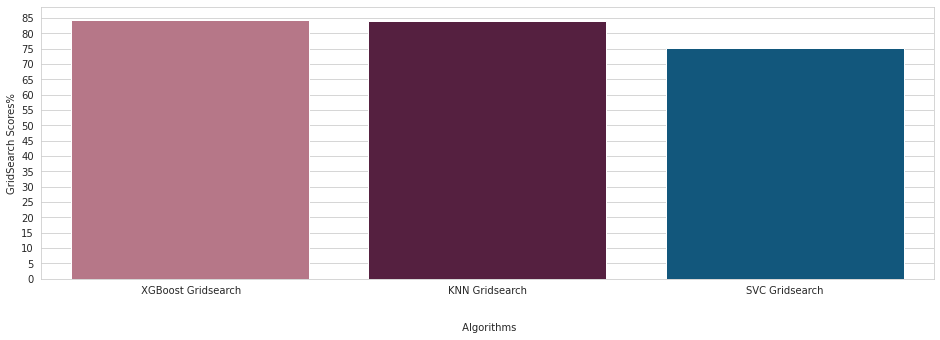

In [46]:
colors = ["#C06C84", "#5E1742", "#005D8E"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,101,5))
plt.ylabel("GridSearch Scores%")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

## RandomSearch CV

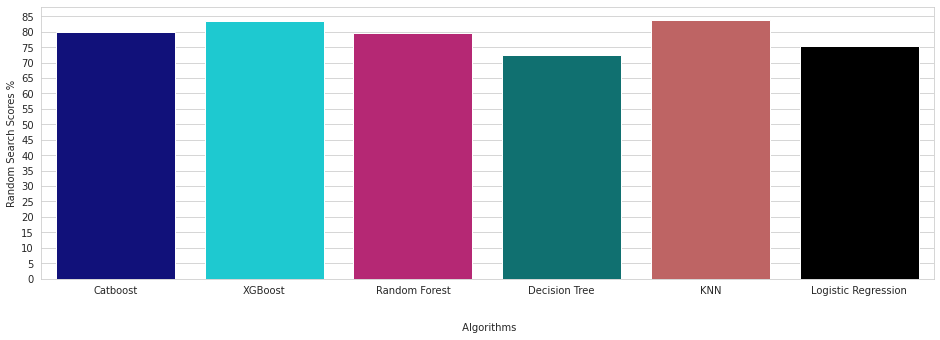

In [47]:
colors = ["#00008b", "#00e5ee", "#cd1076", "#008080","#cd5555",'black']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,101,5))
plt.ylabel("Random Search Scores %")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(randoms.keys()), y=list(randoms.values()), palette=colors)
plt.show()

## Cross Validation

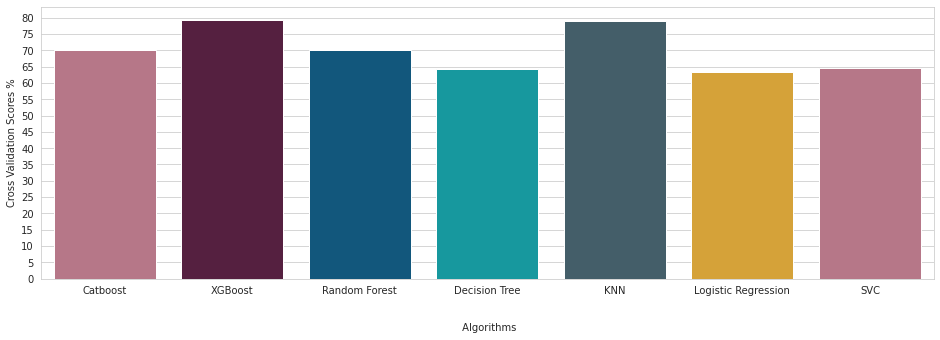

In [48]:
colors = ["#C06C84", "#5E1742", "#005D8E", "#00ADB5","#3E606F","#EFAB1F"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,101,5))
plt.ylabel("Cross Validation Scores %")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(means.keys()), y=list(means.values()), palette=colors)
plt.show()


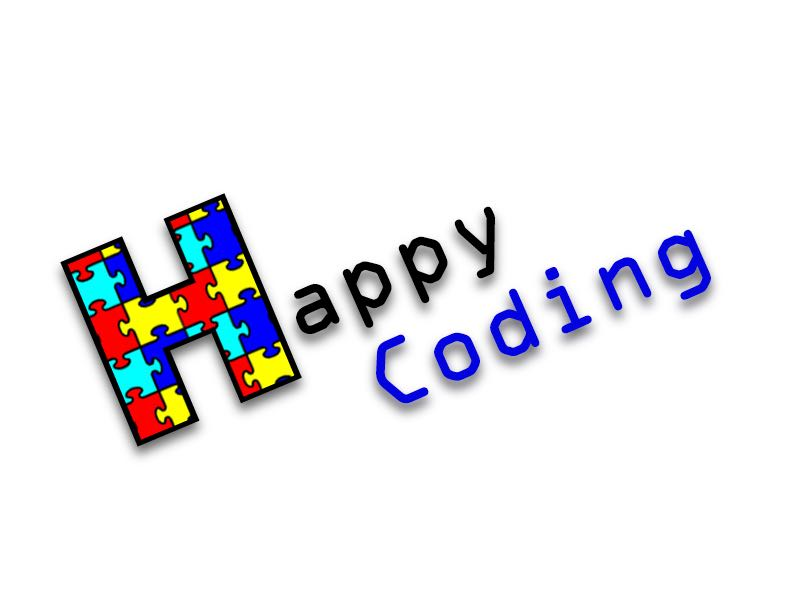